<a href="https://colab.research.google.com/github/S1MPSID/Mnist/blob/main/CNN_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D,
    Dense, Flatten, Dropout, Input
)

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0


In [4]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(x_train.shape)


(60000, 28, 28, 1)


In [5]:
cnn_dropout_model = Sequential([
    Input(shape=(28, 28, 1)),

    Conv2D(32, (3,3), activation="relu"),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),

    Dense(10, activation="softmax")
])

cnn_dropout_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
cnn_dropout_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [7]:
history = cnn_dropout_model.fit(
    x_train,
    y_train,
    epochs=5,
    validation_split=0.1
)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 66s 38ms/step - accuracy: 0.8350 - loss: 0.5082 - val_accuracy: 0.9852 - val_loss: 0.0527
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 62s 37ms/step - accuracy: 0.9676 - loss: 0.1098 - val_accuracy: 0.9853 - val_loss: 0.0480
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 65s 38ms/step - accuracy: 0.9764 - loss: 0.0791 - val_accuracy: 0.9905 - val_loss: 0.0364
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.9795 - loss: 0.0687 - val_accuracy: 0.9903 - val_loss: 0.0318
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.9825 - loss: 0.0556 - val_accuracy: 0.9920 - val_loss: 0.0283


In [8]:
loss, acc = cnn_dropout_model.evaluate(x_test, y_test)
print("CNN with Dropout Test Accuracy:", acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9892 - loss: 0.0310
CNN with Dropout Test Accuracy: 0.9915000200271606


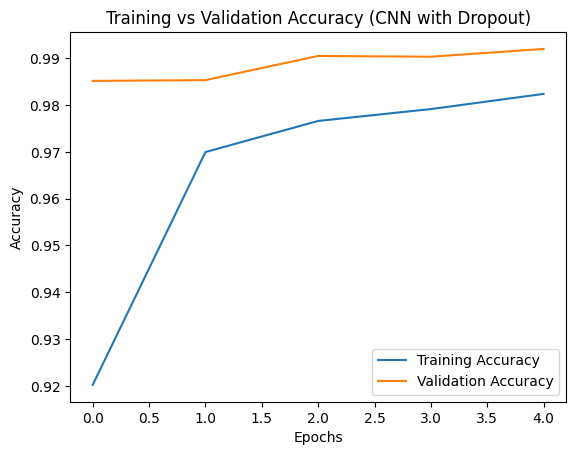

In [9]:
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy (CNN with Dropout)")
plt.show()
